# Predicción de Cancelaciones - Modelos de clasificación

**IDEMEMES**




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from category_encoders import TargetEncoder
#from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [2]:
# Load the parquet file into a pandas DataFrame
df = pd.read_parquet('/content/reservaciones_eda.parquet')

In [3]:
df.head(10)

,id_reservaciones,fecha_hoy,fecha_reservacion,fecha_llegada,fecha_salida,numero_personas,numero_personas_anio_anterior,numero_adultos,numero_adultos_anio_anterior,numero_menores,...,nombre_estatus_reservacion,clave_estado,nombre_estado,total_tarifa,id_moneda,fecha_ultimo_cambio,reservacion,reservacion_anio_anterior,id_cliente_disp,cliente_disp_anio_anterior
0,0,2019-08-16,2019-08-16,2019-07-11,2019-10-11,2,0,2,0,0,...,Salida,Emx,México,2659.98,1,2019-10-11,True,False,2,0
1,1,2019-10-22,2019-10-22,2019-01-12,2019-05-12,4,0,4,0,0,...,Salida,Egt,Guanajuato,1764.00,1,2019-05-12,True,False,4,0
2,2,2019-10-28,2019-10-28,2019-01-12,2019-05-12,2,0,2,0,0,...,Salida,Emc,Michoacán,2660.04,1,2019-05-12,True,False,2,0
3,3,2019-10-28,2019-10-28,2019-08-12,2019-11-12,4,0,3,0,0,...,Salida,Egt,Guanajuato,1995.03,1,2019-11-12,True,False,3,0
4,4,2019-10-28,2019-10-28,2019-08-12,2019-12-12,2,0,2,0,0,...,Salida,Emx,México,13369.92,1,2019-12-12,True,False,2,0
5,5,2019-05-08,2019-05-08,2019-01-12,2019-05-12,6,0,6,0,0,...,Salida,Egt,Guanajuato,2660.04,1,2019-05-12,True,False,6,0
6,6,2019-07-19,2019-07-19,2019-08-22,2019-08-25,2,0,2,0,0,...,Reservacion Cancelada,Egr,Guerrero,3331.98,1,2019-07-24,True,False,2,0
7,7,2019-07-19,2019-07-19,2019-08-23,2019-08-25,2,0,2,0,0,...,Salida,Emc,Michoacán,8809.92,1,2019-08-25,True,False,2,0
8,8,2019-07-19,2019-07-19,2019-08-25,2019-08-29,3,0,2,0,0,...,Salida,Egr,Guerrero,2548.00,1,2019-08-29,True,False,2,0
9,9,2019-06-05,2019-06-05,2019-08-25,2019-08-29,2,0,2,0,0,...,Salida,Emc,Michoacán,2548.00,1,2019-08-29,True,False,2,0


In [4]:
# Genera nuevas columnas uniendo la información del año anterior y el actual


df['hist_personas'] = df['numero_personas'].astype(str) + '-' + df['numero_personas_anio_anterior'].astype(str)
df['hist_adultos'] = df['numero_adultos'].astype(str) + '-' + df['numero_adultos_anio_anterior'].astype(str)
df['hist_menores'] = df['numero_menores'].astype(str) + '-' + df['numero_menores_anio_anterior'].astype(str)
df['hist_noches'] = df['numero_noches'].astype(str) + '-' + df['numero_noches_anio_anterior'].astype(str)
df['hist_total_habitaciones'] = df['total_habitaciones'].astype(str) + '-' + df['total_habitaciones_anio_anterior'].astype(str)

In [5]:
# Define las columnas que no se van a utilizar

columns_to_drop = [col for col in df.columns if col.startswith('id_') and col != 'id_reservaciones']
df = df.drop(columns=columns_to_drop)

In [6]:
# Genera la columna objetivo 'y' con valores booleanos para indicar si se hizo o no una cancelación


df['cancelacion'] = df.nombre_estatus_reservacion.apply(lambda x: 1 if x == 'Reservacion Cancelada' else 0)

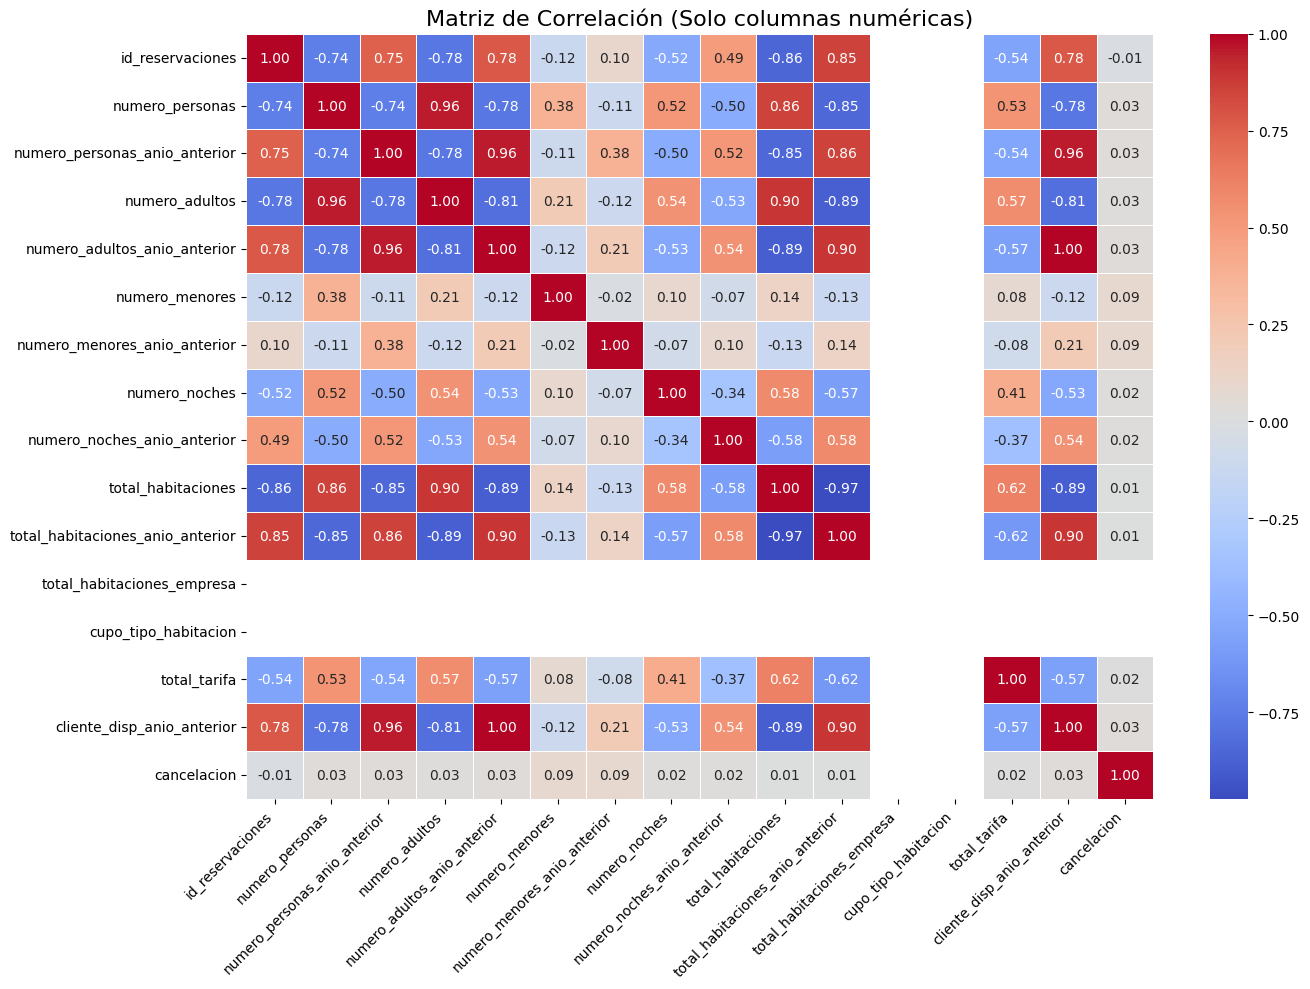

In [7]:
# Seleccionar solo columnas numéricas
df_numerico = df.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = df_numerico.corr()

# Plot del heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación (Solo columnas numéricas)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [8]:
df_cancelations = df[df.cancelacion == 1]


In [9]:
df_copy = df.copy()

In [10]:
df_cancelations

,id_reservaciones,fecha_hoy,fecha_reservacion,fecha_llegada,fecha_salida,numero_personas,numero_personas_anio_anterior,numero_adultos,numero_adultos_anio_anterior,numero_menores,...,fecha_ultimo_cambio,reservacion,reservacion_anio_anterior,cliente_disp_anio_anterior,hist_personas,hist_adultos,hist_menores,hist_noches,hist_total_habitaciones,cancelacion
6,6,2019-07-19,2019-07-19,2019-08-22,2019-08-25,2,0,2,0,0,...,2019-07-24,True,False,0,2-0,2-0,0-0,3-0,1-0,1
15,15,2019-04-27,2019-04-27,2019-10-20,2019-10-23,3,0,1,0,2,...,2019-11-10,True,False,0,3-0,1-0,2-0,3-0,1-0,1
16,16,2019-08-17,2019-08-17,2019-07-11,2019-10-11,2,0,2,0,0,...,2019-06-11,True,False,0,2-0,2-0,0-0,3-0,1-0,1
17,17,2019-08-17,2019-08-17,2019-07-11,2019-10-11,2,0,2,0,0,...,2019-06-11,True,False,0,2-0,2-0,0-0,3-0,1-0,1
18,18,2019-08-17,2019-08-17,2019-07-11,2019-10-11,2,0,2,0,0,...,2019-06-11,True,False,0,2-0,2-0,0-0,3-0,1-0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202986,202986,2020-05-02,2019-05-02,2019-11-04,2019-04-18,0,2,0,2,0,...,2019-09-04,False,True,2,0-2,0-2,0-0,0-7,0-1,1
202987,202987,2020-05-02,2019-05-02,2019-11-04,2019-04-18,0,1,0,1,0,...,2019-09-04,False,True,1,0-1,0-1,0-0,0-7,0-1,1
202991,202991,2020-01-18,2019-01-18,2019-04-04,2019-11-04,0,3,0,3,0,...,2019-03-04,False,True,3,0-3,0-3,0-0,0-7,0-1,1
202996,202996,2020-10-04,2019-10-04,2019-10-04,2019-10-04,0,2,0,2,0,...,2019-10-04,False,True,2,0-2,0-2,0-0,0-3,0-1,1


## Feature Engineering

Dado el EDA y el heatmap de correlación, se observa que no hay una relación directa entre nuestras variables X con la variable objetivo 'y' que se quiere predecir, por lo que es necesario realizar Feature Engineering con el fin de mejorar los coeficientes de correlación y que así el modelo pueda desempeñarse mejor a partir de mejores datos.

La técnica que se aplicará se basa calcular los 'pesos' que tiene cada una de las variables sobre la columna binaria 'cancelaciones' utilizando un subset de datos donde sólo hubo cancelaciones positivas (cancelaciones = 1). Los pesos se calculan a partir de obtener la proporción que ocupa cada evento de todos los cancelados a pertir del promedio. Por ejemplo: *En promedio hubo más cancelacioens para reservaciones hechas para 2 que para 5 personas*.

De este modo se espera en primer lugar obtener vaolres estandarizados que van del 0 al 100 (representando el porcentaje) y que la correlación mejore.

In [11]:
# Función para calcular los pesos

def calcular_peso_columna(df, columna, nombre_columna_resultado=None):
    nombre_columna_resultado = nombre_columna_resultado or columna
    # Conteo
    peso = df[columna].astype(str).value_counts().reset_index()
    peso.columns = [nombre_columna_resultado, 'conteo']
    # Proporción
    total = peso['conteo'].sum()
    peso['proporcion'] = (peso['conteo'] / total * 100).round(3)
    return peso

In [12]:
columnas_a_utilizar = ['hist_personas', 'hist_adultos', 'hist_menores', 'hist_noches', 'hist_total_habitaciones','nombre_programa','nombre_paquete','nombre_segmento','nombre_agencia','ciudad_agencia'
,'entidad_federativa_agencia','pais_agencia','nombre_empresa','total_habitaciones_empresa','nombre_tipo_habitacion','cupo_tipo_habitacion','clasificacion_tipo_habitacion','nombre_canal','nombre_pais_origen'
,'nombre_estado','total_tarifa']

pesos = {}

for col in columnas_a_utilizar:
    nombre_df = f"peso_{col.replace('#_', '')}"  # limpia nombre si tiene '#_'
    pesos[nombre_df] = calcular_peso_columna(df=df_cancelations, columna=col)



In [13]:
pesos['peso_pais_agencia']


,pais_agencia,conteo,proporcion
0,México,32171,96.607
1,Canada,904,2.715
2,Estados Unidos,176,0.529
3,Tarifas,40,0.120
4,Costa Rica,10,0.030


In [ ]:
# Creamos un diccionario de mapeo: {valor_original: proporción}
mapa_pesos_pais = dict(zip(
    pesos['peso_pais_agencia']['pais_agencia'],
    pesos['peso_pais_agencia']['proporcion']
))


In [ ]:
# Reemplazar en df
df['pais_agencia'] = df['pais_agencia'].map(mapa_pesos_pais)


In [14]:
# Reemplaza los valores en el df con los pesos asignados a cada variable del diccionario

for col in columnas_a_utilizar:
    nombre_peso = f"peso_{col.replace('#_', '')}"  # nombre clave del diccionario de pesos

    if nombre_peso in pesos:
        # Crear el mapeo y reemplazar valores por proporción en df
        mapa = dict(zip(
            pesos[nombre_peso][col],
            pesos[nombre_peso]['proporcion']
        ))
        df[col] = df[col].map(mapa)

In [22]:
# Función para obtener un análisis descriptivo más completo del df

def data_description(data):
    rows = data.shape[0]
    data_types = data.dtypes
    counts = data.apply(lambda x: x.count())
    unique_vals = data.apply(lambda x: x.unique().shape[0])
    dups = data.apply(lambda x: x.duplicated().sum())
    nulls = data.apply(lambda x: x.isnull().sum())
    null_percent = round((data.isnull().sum()/rows)*100,2)
    cols = {'dtype':data_types, 'No. data':counts, 'Unique Values':unique_vals, 'Duplicates':dups, 'Nulls':nulls, '% Nulls':null_percent}
    table = pd.DataFrame(data=cols)
    return table

In [23]:
data_description(df).sort_values(by='Nulls', ascending=False)

,dtype,No. data,Unique Values,Duplicates,Nulls,% Nulls
total_habitaciones_empresa,float64,0,1,203001,203002,100.00
total_tarifa,float64,0,1,203001,203002,100.00
cupo_tipo_habitacion,float64,0,1,203001,203002,100.00
nombre_agencia,float64,199950,58,202944,3052,1.50
ciudad_agencia,float64,201674,36,202966,1328,0.65
nombre_estado,float64,201814,32,202970,1188,0.59
nombre_paquete,float64,202470,5,202997,532,0.26
fecha_ultimo_cambio,datetime64[ns],202505,521,202481,497,0.24
nombre_programa,float64,202510,2,203000,492,0.24
hist_total_habitaciones,float64,202510,10,202992,492,0.24


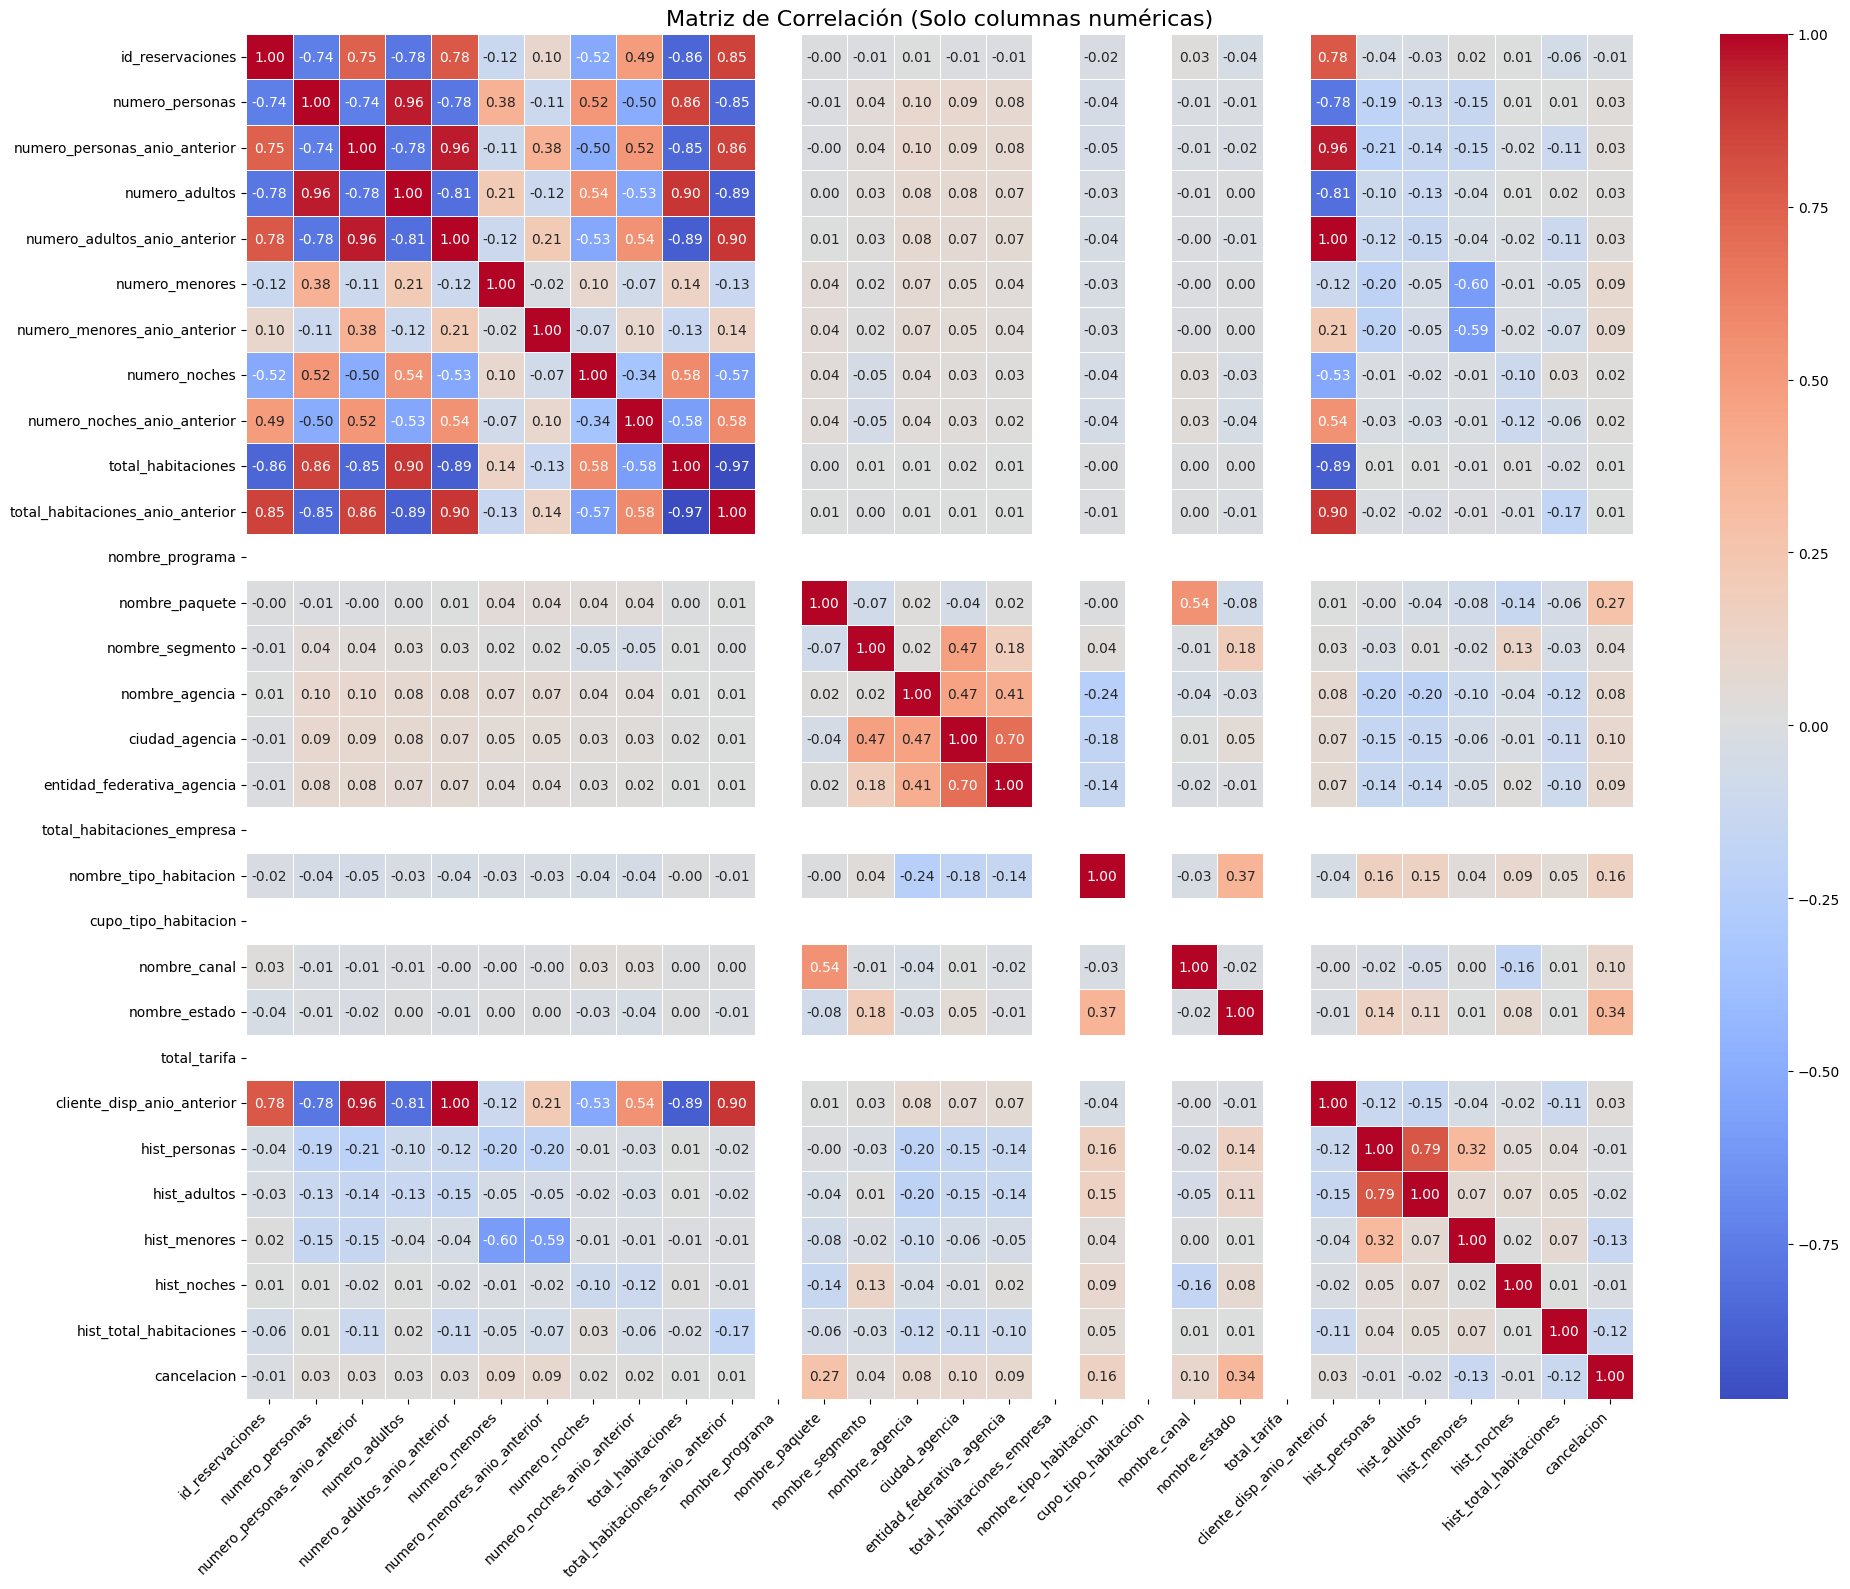

In [15]:
# Seleccionar solo columnas numéricas
df_numerico = df.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = df_numerico.corr()

# Plot del heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación (Solo columnas numéricas)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Se puede ver que hubo un aumento considerable en el coeficiente de correlación de algunas variables sobre nuestra variable objetivo 'cancelacion', por lo que las columnas que se considerarán las X para el desarrollo de los modelos serán aquellas con un coeficiente de correlación igual o mayor a 0.10

In [ ]:
df.columns

Index(['id_reservaciones', 'fecha_hoy', 'fecha_reservacion', 'fecha_llegada',
       'fecha_salida', 'numero_personas', 'numero_personas_anio_anterior',
       'numero_adultos', 'numero_adultos_anio_anterior', 'numero_menores',
       'numero_menores_anio_anterior', 'numero_noches',
       'numero_noches_anio_anterior', 'total_habitaciones',
       'total_habitaciones_anio_anterior', 'nombre_programa', 'nombre_paquete',
       'nombre_segmento', 'nombre_agencia', 'ciudad_agencia',
       'entidad_federativa_agencia', 'pais_agencia', 'nombre_empresa',
       'total_habitaciones_empresa', 'nombre_tipo_habitacion',
       'cupo_tipo_habitacion', 'clasificacion_tipo_habitacion', 'nombre_canal',
       'nombre_pais_origen', 'reservacion_pendiente',
       'nombre_estatus_reservacion', 'clave_estado', 'nombre_estado',
       'total_tarifa', 'fecha_ultimo_cambio', 'reservacion',
       'reservacion_anio_anterior', 'cliente_disp_anio_anterior', '#_personas',
       '#_adultos', '#_menores', '#

In [16]:
df.to_parquet('reservaciones_fe.parquet', index=False)

## Modelo Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [19]:
pd.set_option('display.max_columns', None)

In [20]:

X = df[['nombre_paquete','ciudad_agencia','nombre_tipo_habitacion','nombre_canal','nombre_estado','hist_menores','hist_total_habitaciones']]  # columnas numéricas con mayor correlación
y = df['cancelacion']

In [21]:
X.dtypes

,0
nombre_paquete,float64
ciudad_agencia,float64
nombre_tipo_habitacion,float64
nombre_canal,float64
nombre_estado,float64
hist_menores,float64
hist_total_habitaciones,float64


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dado que la clase de la variable objetivo 'cancelaciones' esta altamente desbalanceada (0,1) a favor de la clase '1', se aplicará un método de balanceo que le permita al modelo tener un mejor performance, aprender bien de los datos y sobre todo sin generar datos sintéticos.

In [25]:
!pip install imblearn

In [26]:
from imblearn.ensemble import BalancedRandomForestClassifier

model = BalancedRandomForestClassifier(
    n_estimators=100,
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [27]:

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93     33900
           1       0.63      0.88      0.73      6701

    accuracy                           0.89     40601
   macro avg       0.80      0.89      0.83     40601
weighted avg       0.92      0.89      0.90     40601



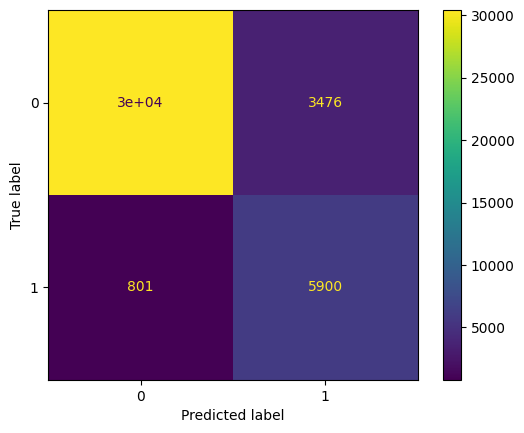

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)


In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"precision: {precision:.4f}")
print(f"recall: {recall:.4f}")
print(f"F1-score {f1:.4f}")


precision: 0.6293
recall: 0.8805
F1-score 0.7340


In [31]:
# Genera pickle file para guardar el modelo

import pickle
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(model, f)

Dada la naturaleza del problema, se busca reducir lo más que se pueda la presencia de resultados False Negative, es decir predicciones que hayan dado como resultado 'cancelacion = 0' cuando en realidad si fueron canceladas 'cancelacion = 1'. Por esta observación la métrica que se toma en cuenta para evaluar los modelos será el **recall**

Como se puede ver el modelo obtuvo un performance muy bueno con un valor de 0.885 de recall.

A continuación se aplicará otro modelo muy bueno para este tipo de problemas, buscando mejorar un poco el performance del Random Forest

## Modelo XGBoost

In [32]:
X = df[['nombre_paquete','ciudad_agencia','nombre_tipo_habitacion','nombre_canal','nombre_estado','hist_menores','hist_total_habitaciones']]  # columnas numéricas con mayor correlación
y = df['cancelacion']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Entrenar el modelo
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=(len(y_train[y_train == 0]) / len(y_train[y_train == 1])),
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:29:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [35]:
y_pred_xgb = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.97      0.90      0.94     33900
           1       0.64      0.87      0.74      6701

    accuracy                           0.90     40601
   macro avg       0.81      0.89      0.84     40601
weighted avg       0.92      0.90      0.90     40601



In [37]:
from sklearn.metrics import recall_score

# 1. Predecir etiquetas
y_pred_xgb = xgb_model.predict(X_test)

# 2. Calcular recall
recall = recall_score(y_test, y_pred_xgb)

print(f"Recall del modelo XGBoost: {recall:.4f}")


Recall del modelo XGBoost: 0.8697


In [38]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Definir el modelo base
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=(len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
)

# Hiperparámetros a buscar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Búsqueda aleatoria (más rápida que GridSearch)
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=20,
    scoring='recall',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Ejecutar búsqueda
random_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = random_search.best_estimator_

print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:32:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores hiperparámetros encontrados:
{'subsample': 1.0, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.3, 'colsample_bytree': 0.8}


In [39]:
from xgboost import XGBClassifier

best_xgb = XGBClassifier(
    subsample=1.0,
    n_estimators=200,
    max_depth=6,
    learning_rate=0.3,
    colsample_bytree=0.8,
    scale_pos_weight=(len(y_train[y_train == 0]) / len(y_train[y_train == 1])),
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

best_xgb.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:32:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [40]:
from sklearn.metrics import classification_report

y_pred_best = best_xgb.predict(X_test)
print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       0.98      0.90      0.94     33900
           1       0.64      0.88      0.74      6701

    accuracy                           0.90     40601
   macro avg       0.81      0.89      0.84     40601
weighted avg       0.92      0.90      0.90     40601



In [41]:
from sklearn.metrics import recall_score

# Predicción directa con umbral 0.5 por defecto
y_pred_best = best_xgb.predict(X_test)

# Calcular recall
recall = recall_score(y_test, y_pred_best)

print(f"BEST XGBoost: {recall:.4f}")


BEST XGBoost: 0.8835


In [42]:
train_pred = best_xgb.predict(X_train)
test_pred = best_xgb.predict(X_test)

from sklearn.metrics import recall_score

train_recall = recall_score(y_train, train_pred)
test_recall = recall_score(y_test, test_pred)

print(f"Recall en entrenamiento: {train_recall:.4f}")
print(f"Recall en prueba:        {test_recall:.4f}")


Recall en entrenamiento: 0.8903
Recall en prueba:        0.8835


In [43]:
# Genera pickle file para guardar el modelo

import pickle
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(best_xgb, f)

Finalmente se logró mejorar un poco el performance del modelo, por lo que va a optar por utilizar el modelo xgboost